In [1]:
#initializing workspace
import pandas as pd
import matplotlib.pyplot as plt
import trxtools as tt
import os
from pyCRAC.Parsers import GTF2
import pyBigWig
import numpy as np
from trxtools.BigWig import *
from scipy.signal import argrelextrema

pathTAB = "../seq_references/Saccharomyces_cerevisiae.EF4.74.dna.toplevel.shortChrNames.tab"
pathGTF = "../seq_references/Saccharomyces_cerevisiae.EF4.74.shortChNames_with_PolIII_transcripts_extended_slop_intergenic_sort.gtf"
gtf = GTF2.Parse_GTF()
gtf.read_GTF(pathGTF)
gtf.read_TAB(pathTAB)

sequences = pd.read_csv(pathTAB, sep='\t',names=['chr','sequence'],index_col=0)
chr_len = sequences['sequence'].str.len()

pathDir = "../04_BigWig/"
pathMeta = "../06_metadata/"

dinucleotides = pd.read_csv(pathMeta+'/properties_of_dinucleotides.csv', index_col=0)
dinucleotides.index = dinucleotides.reset_index().index.astype(str)+"_"+dinucleotides.index

cleavage_sites = {"5' end" : (300),
                   'A0' : (300+609),
                   'A1' : (300+700),
                   'D'  : (300+2500),
                   'A2' : (300+2712),
                   'A3' : (300+2784),
                   'B1L': (300+2855),
                   'B1S': (300+2861),
                   'E'  : (300+3019),
                   'C1' : (300+3251),
                   'B2' : (300+6647),
                   'B0-1' : (300+6661),
                   'B0-2' : (300+6697),
                   'T1' : (300+6739)}

# print(gtf.strand("RDN37-1"), gtf.chromosome("RDN37-1"), gtf.chromosomeCoordinates("RDN37-1"))
# print(gtf.strand("RDN37-2"), gtf.chromosome("RDN37-2"), gtf.chromosomeCoordinates("RDN37-2"))

flank = 2000

seq1_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][451785-flank:457732+flank])
seq2_flank = tt.methods.reverse_complement(sequences.loc['chrXII'][0][460922-flank:466869+flank])

#loading datasets

data_files_3end = [f for f in os.listdir(pathDir) if 'PROFILE_3end' in f and "polyA" not in f and "bw" in f]

print(len(os.listdir(pathDir)))
print(len(data_files_3end))

df01a_RDN371_datasets_3end = geneFromBigWig(gene_name="RDN37-1", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
s1_RDN371_sequence = df01a_RDN371_datasets_3end['nucleotide'] #kee[ for future use
df01b_RDN372_datasets_3end = geneFromBigWig(gene_name="RDN37-2", data_path=pathDir, data_files=data_files_3end, gtf=gtf,ranges=flank)
df01_RDN37_3end = df01a_RDN371_datasets_3end.drop('nucleotide',axis='columns') + df01b_RDN372_datasets_3end.drop('nucleotide',axis='columns')

/home/tturowski/TurowskiLab/trxtools/trxtools/plotting.py:277: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plotAndFolding(df=pd.DataFrame(),dG=pd.Series(), title="", start=None, stop=None,


560
112


# Fig X Rpa12 role in termination

In [2]:
df11_Rpa135_wt_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP'], 
                                     let_out=['Rpa12dC',"noUV"],stats=True)

df12_Rpa135_rpa12d_3end = tt.profiles.preprocess(df01b_RDN372_datasets_3end,
                                     let_in=['Rpa135HTP','Rpa12dC'],stats=True)

Experiments: 
['C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end']
Experiments: 
['EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end']


/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

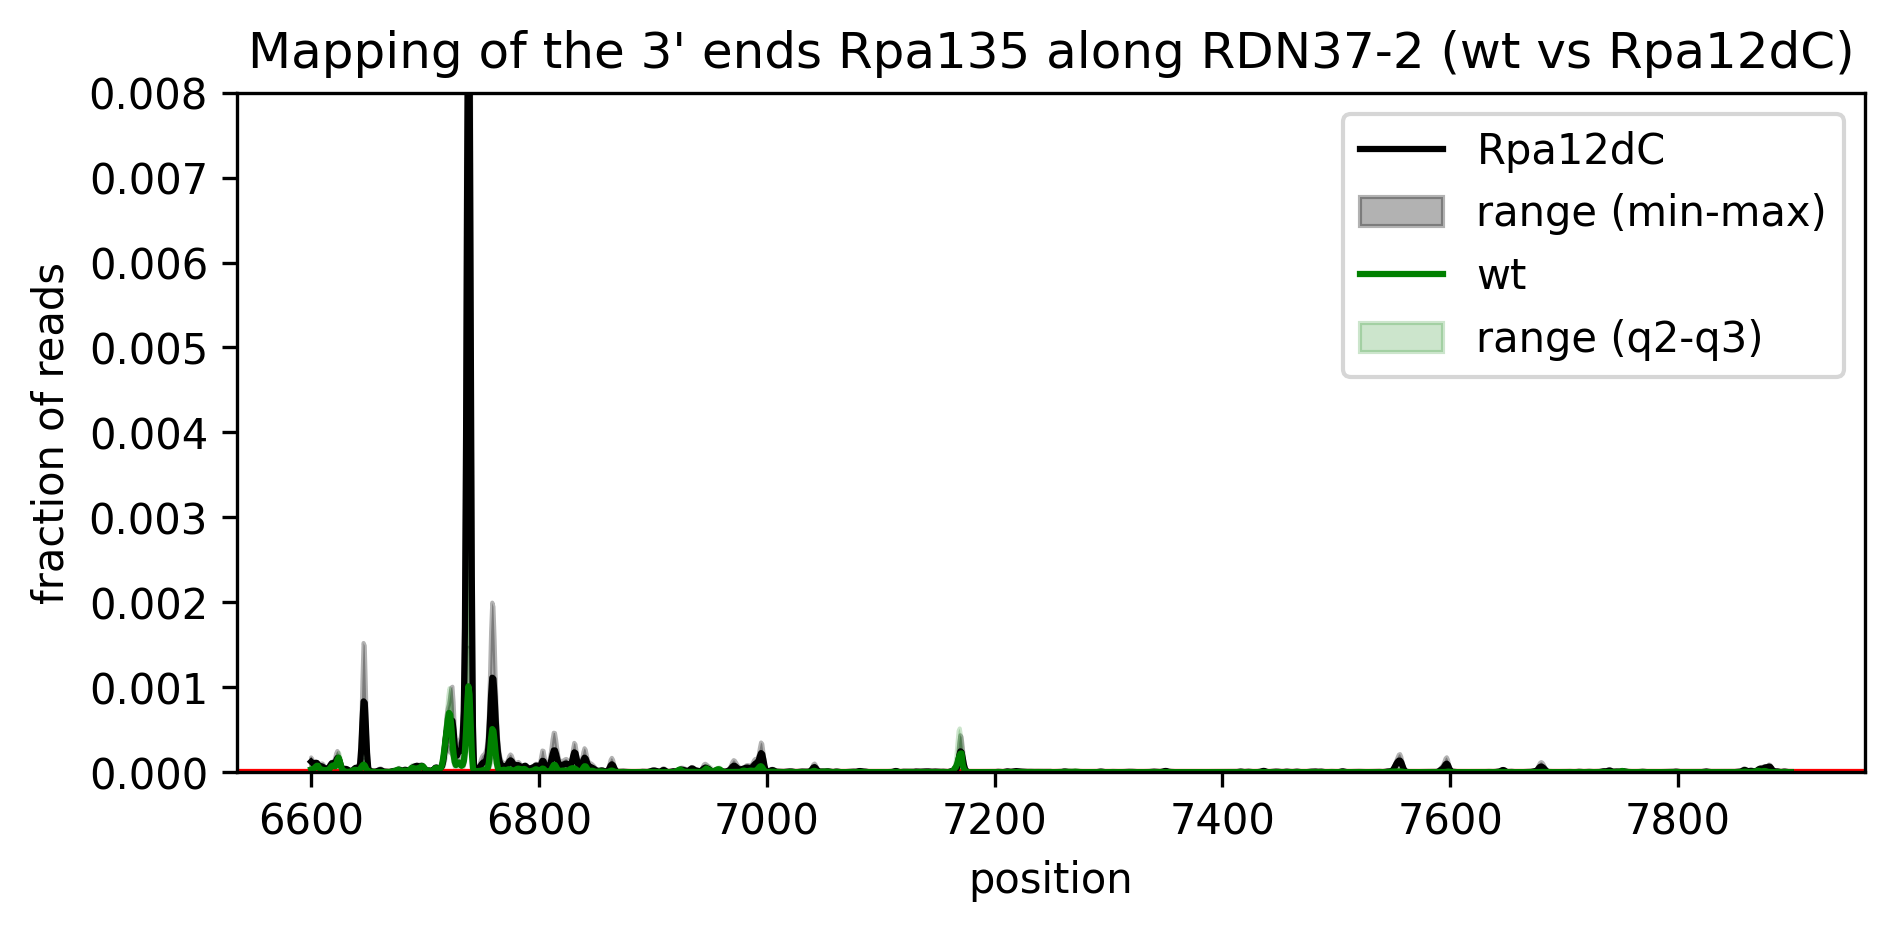

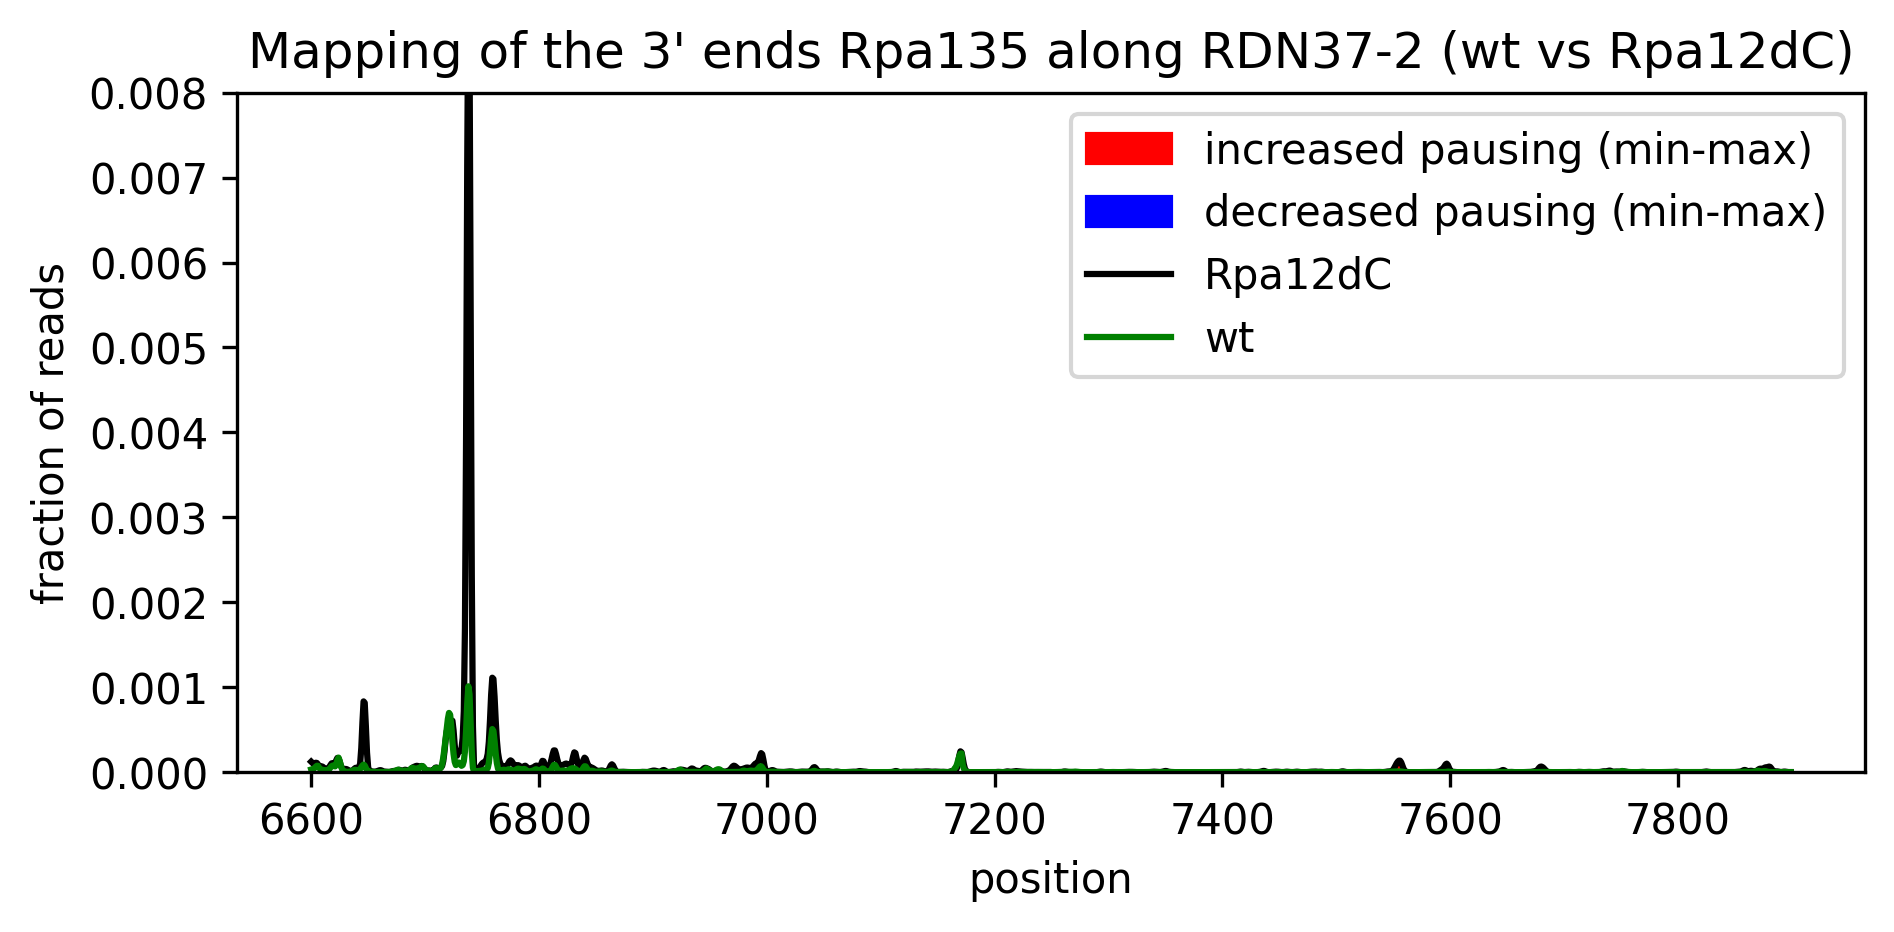

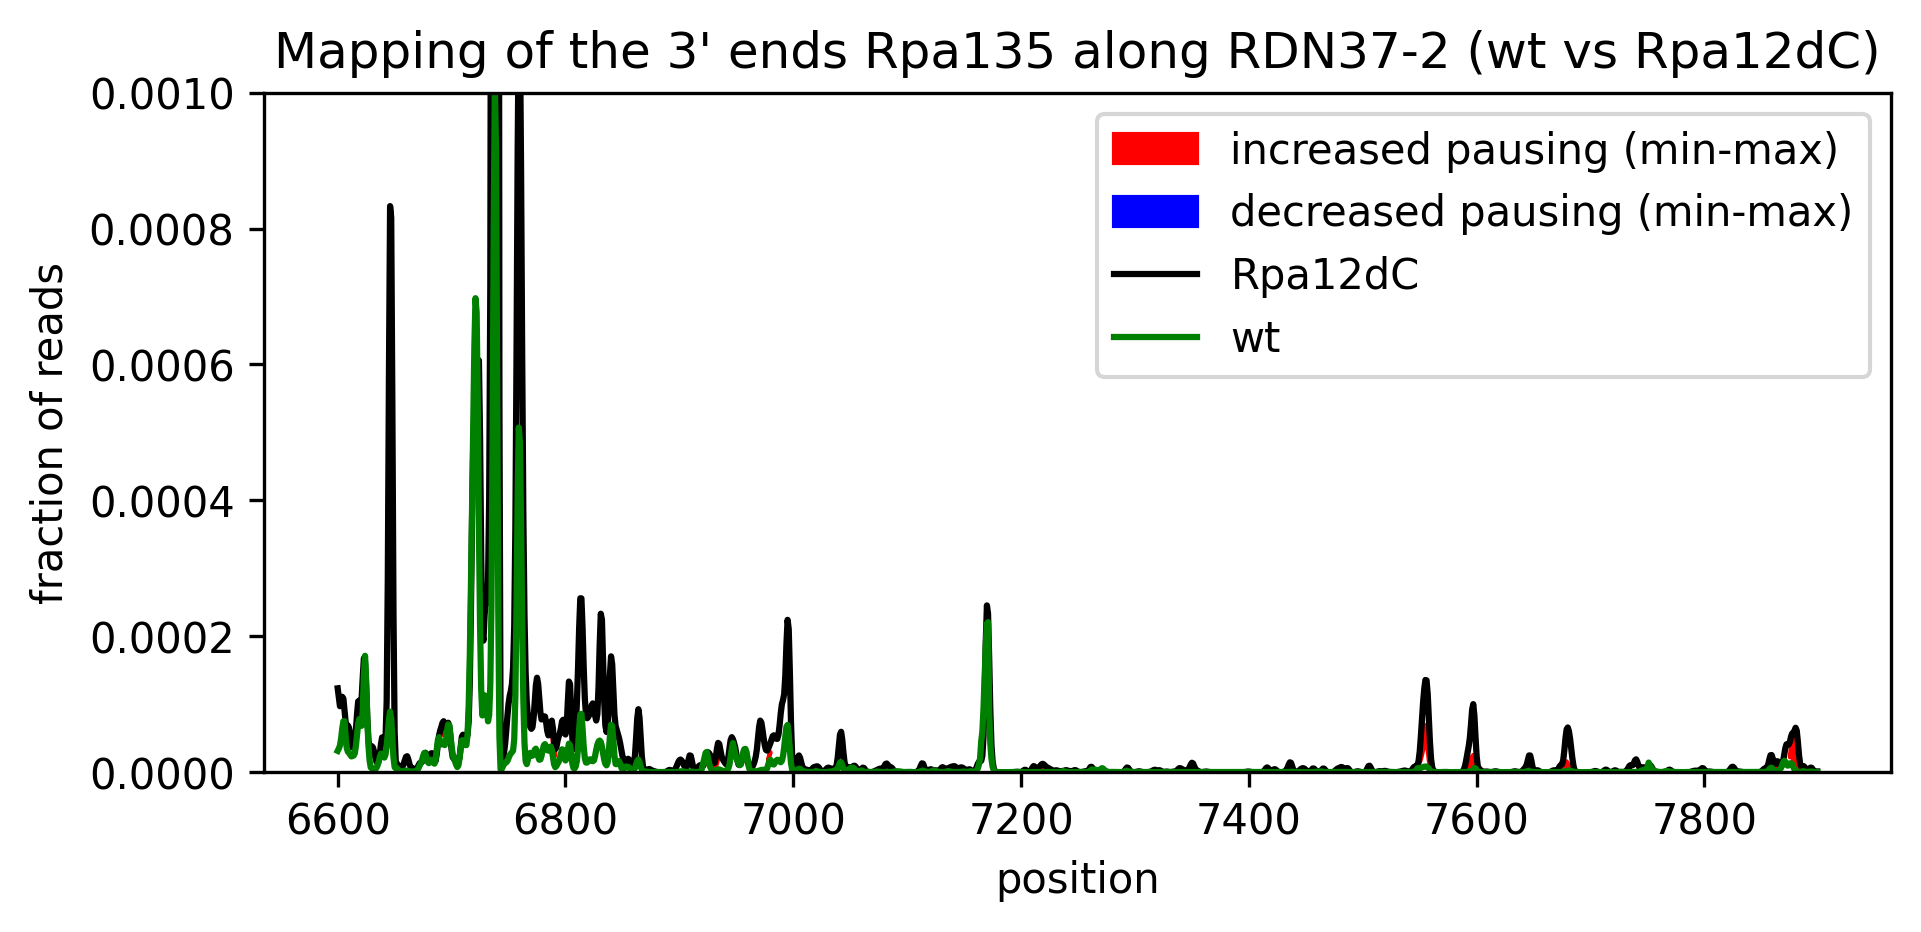

In [4]:
start=6600+1300
stop=7900+1300

tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(7,3),ref_label="wt",label="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",
                           dpi=300,offset=1300, ylim=(0,0.008),
                           start=start, stop=stop, fname='Fig_xA.png')

# tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(7,3),ref_label="wt",label="Rpa12dC",
#                            title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",
#                            dpi=300,offset=300, ylim=(0,0.0005),
#                            start=start, stop=stop, fname='Fig_xB.png')

# tt.plotting.plot_to_compare(ref=df11_Rpa135_wt_3end, df=df12_Rpa135_rpa12d_3end,figsize=(5,3),ref_label="wt",label="Rpa12dC",
#                            title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",
#                            dpi=300,offset=300, ylim=(0,0.00001),
#                            start=300+7020, stop=stop, fname='Fig_xB.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.008),ranges='mm',
                           start=start, stop=stop, fname='Fig_xAv2.png')

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.001),ranges='mm',
                           start=start, stop=stop, fname='Fig_xAv2.png')

In [ ]:
xxxx

In [ ]:
# polyA fraction in Rpa12dC

In [ ]:
xxxx

/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

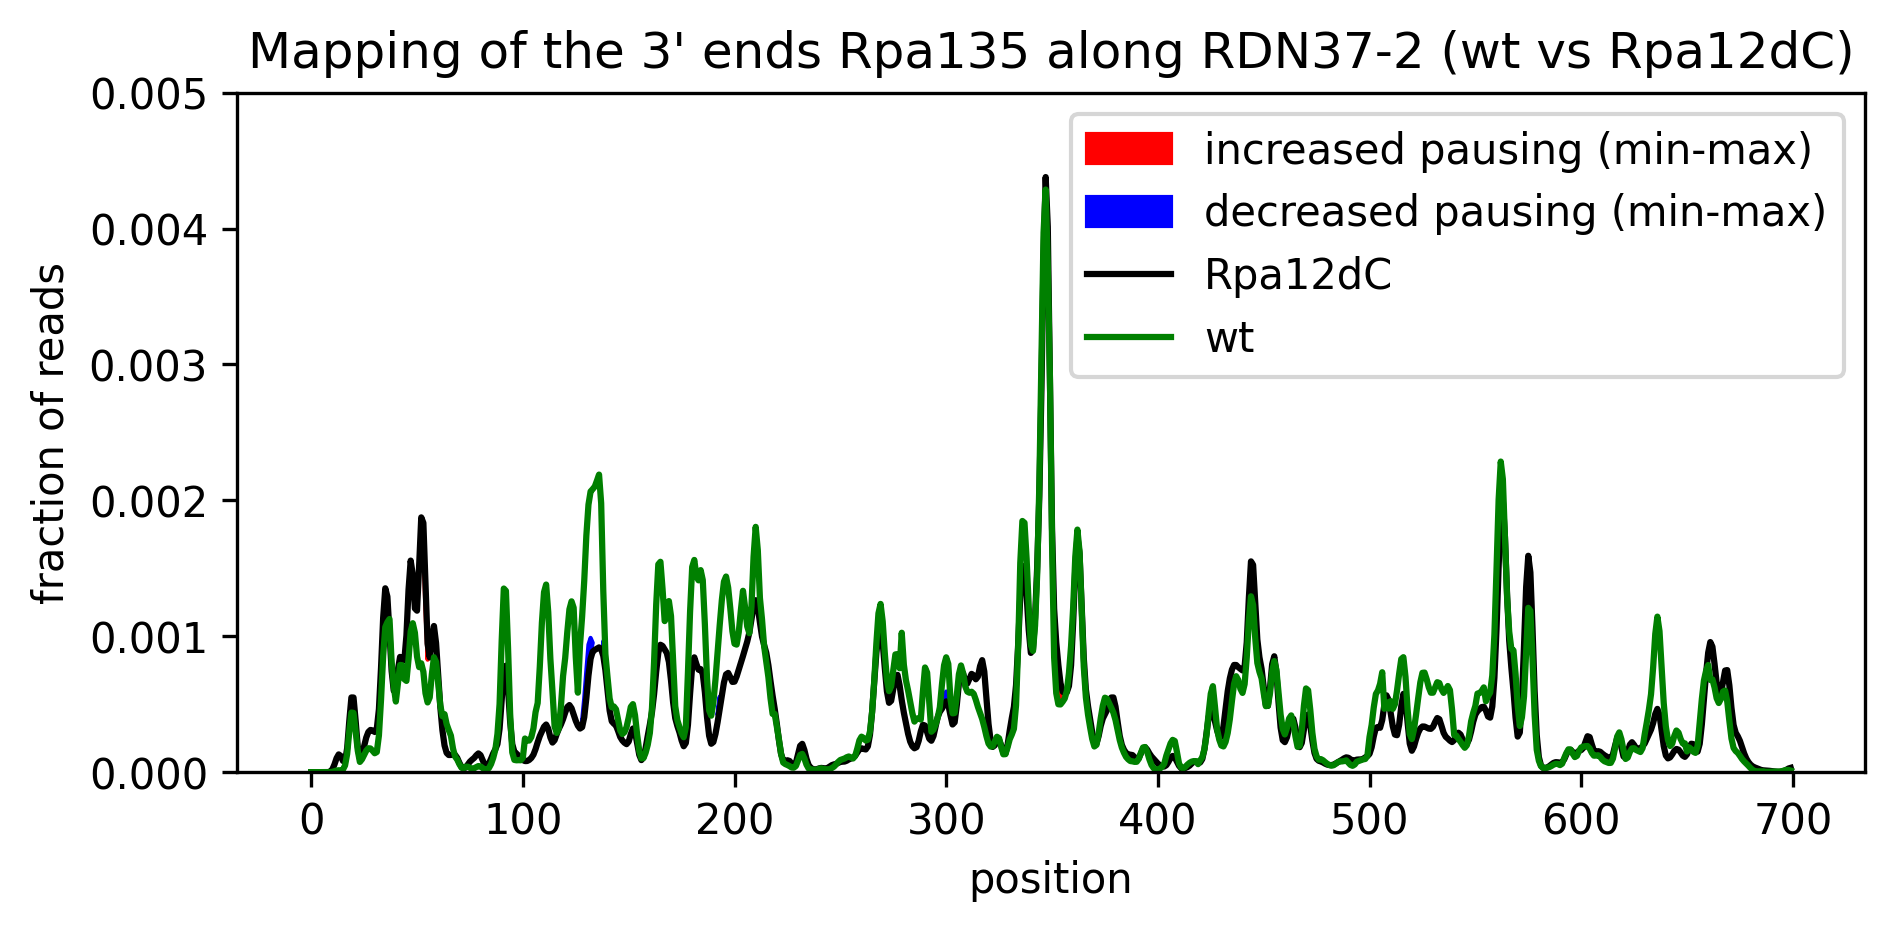

In [17]:
start=1300
stop=2000

tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(7,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.005),ranges='mm',
                           start=start, stop=stop, fname='Fig_xAv2.png')

There is too high variability in the data to compare size of the termination peak. More replicates would be needed

In [ ]:
# check kinetics of RNAPI wt and Rpa12dC  - sums, or tilted cumsum

1.4189906097552017e-08
0.04796943279996853


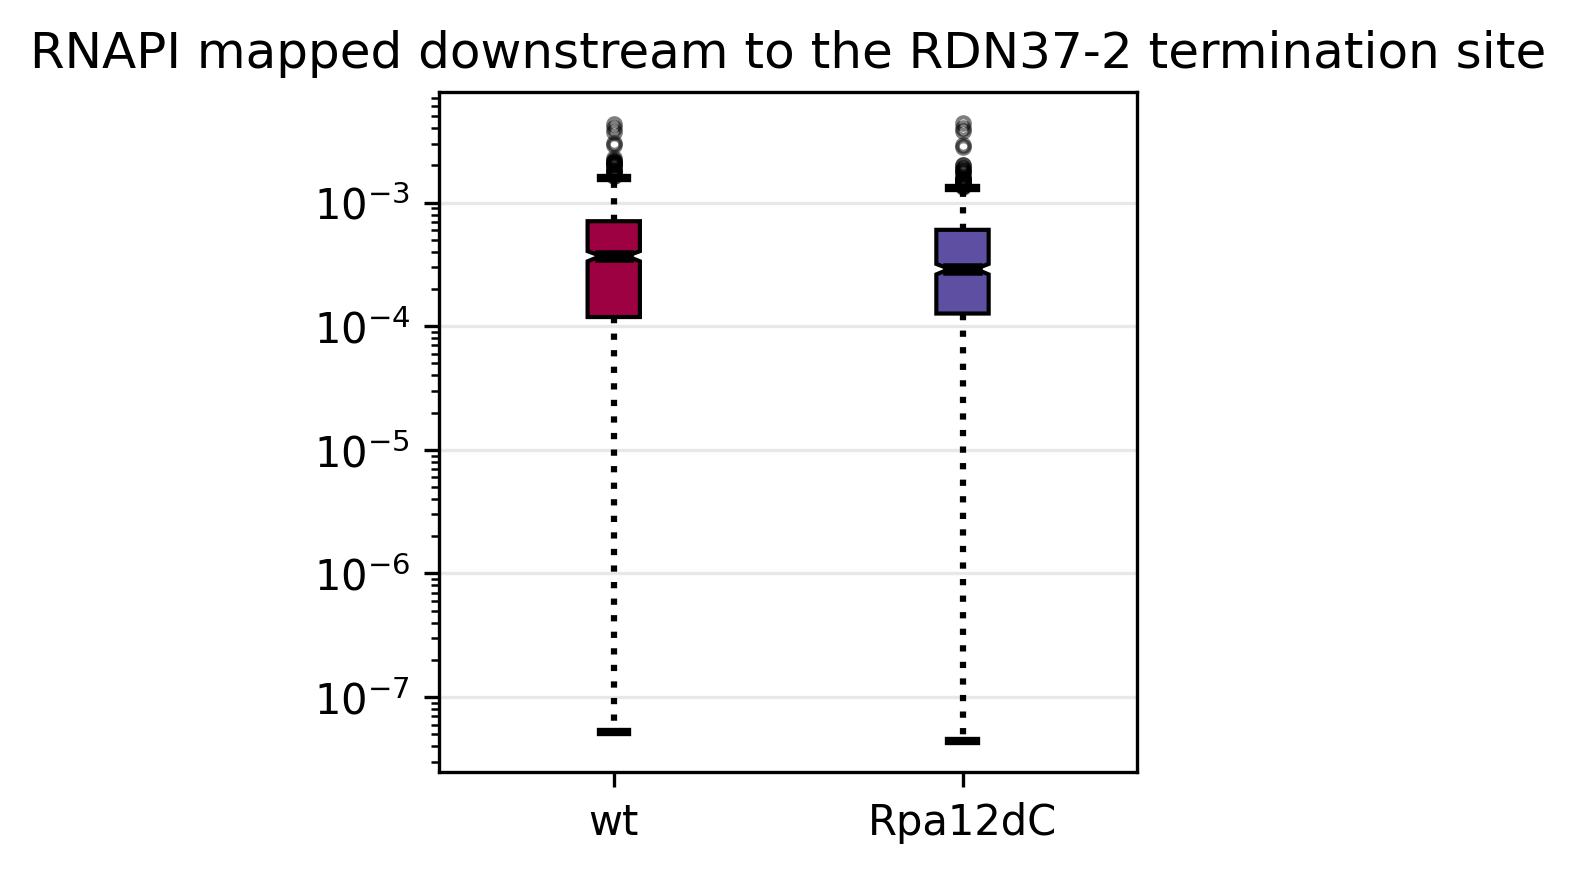

In [18]:
wt = df11_Rpa135_wt_3end[1300:2000]
a12dC = df12_Rpa135_rpa12d_3end[1300:2000]

data = [wt['median'].dropna().tolist(),a12dC['median'].dropna().tolist()]
labels=["wt","Rpa12dC"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(3,3),dpi=300,fname='Fig_xC.png',
                     title="RNAPI mapped downstream to the RDN37-2 termination site")

from scipy import stats

out = stats.wilcoxon(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])
out = stats.ranksums(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])

In [24]:
df11_Rpa135_wt_3end[1300:2000]['median'].sum()

0.35353814337220507

In [23]:
df12_Rpa135_rpa12d_3end[1300:2000]['median'].sum()

0.3019283642648709

In [ ]:
xxx

1.291093739171172e-146
3.141307132501584e-20


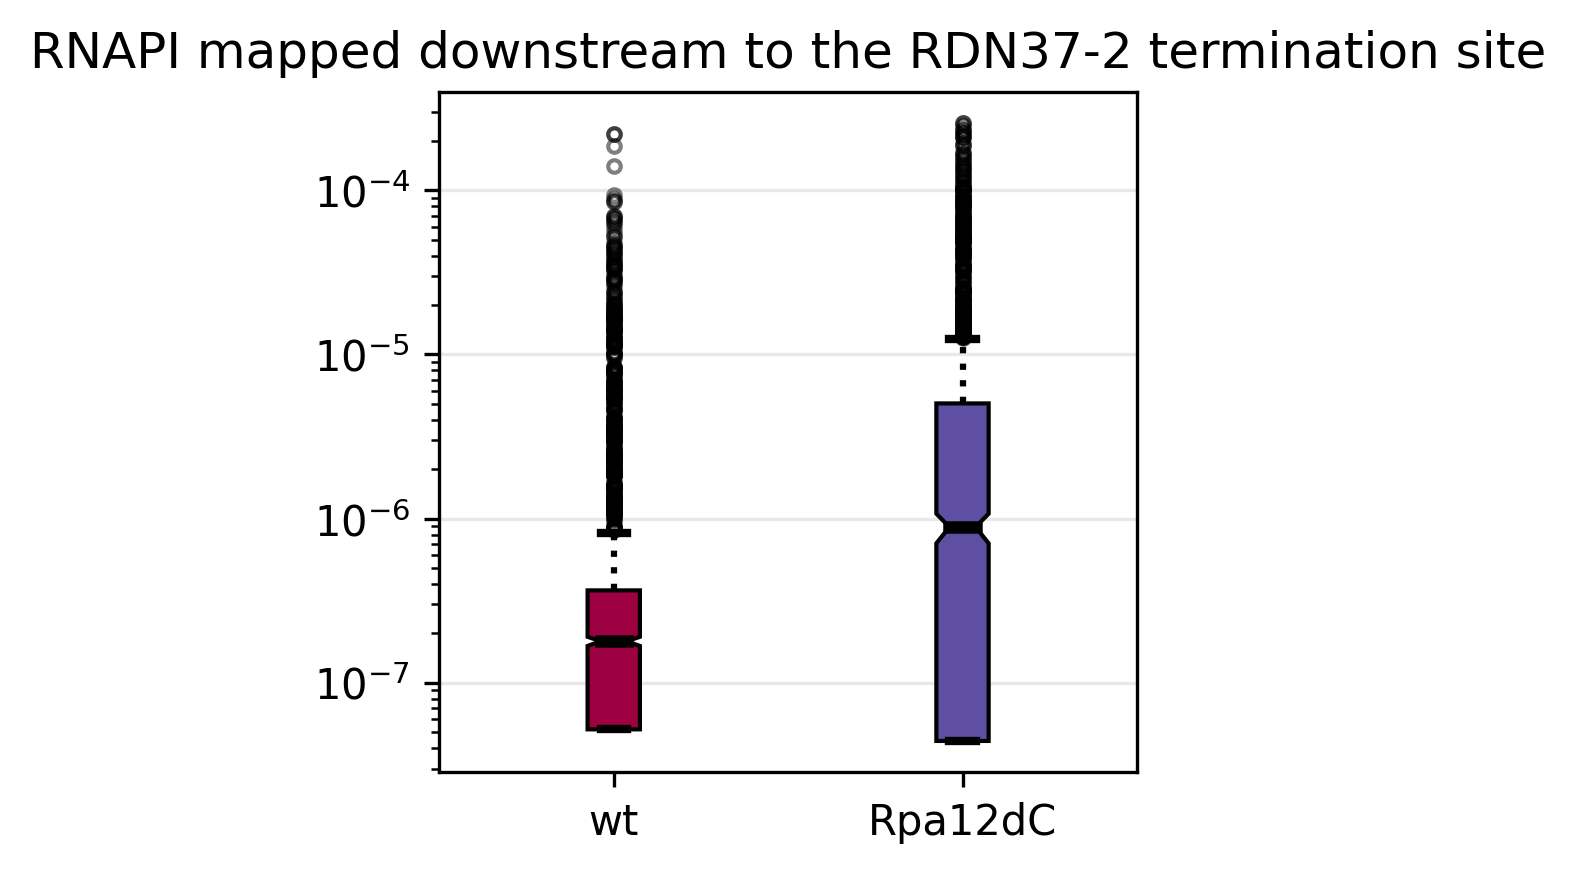

In [6]:
wt = df11_Rpa135_wt_3end[8100:]
a12dC = df12_Rpa135_rpa12d_3end[8100:]

data = [wt['median'].dropna().tolist(),a12dC['median'].dropna().tolist()]
labels=["wt","Rpa12dC"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(3,3),dpi=300,fname='Fig_xC.png',
                     title="RNAPI mapped downstream to the RDN37-2 termination site")

from scipy import stats

out = stats.wilcoxon(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])
out = stats.ranksums(wt['median'].fillna(0.0),a12dC['median'].fillna(0.0))
print(out[1])

## additional plots to validate the result

/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:415: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_min'][differences_df['ref_above_exp'] > 0] = differences_df['exp_max']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:416: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  differences_df['rae_max'][differences_df['ref_above_exp'] > 0] = differences_df['ref_min']
/home/tturowski/TurowskiLab/trxtools/trxtools/profiles.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

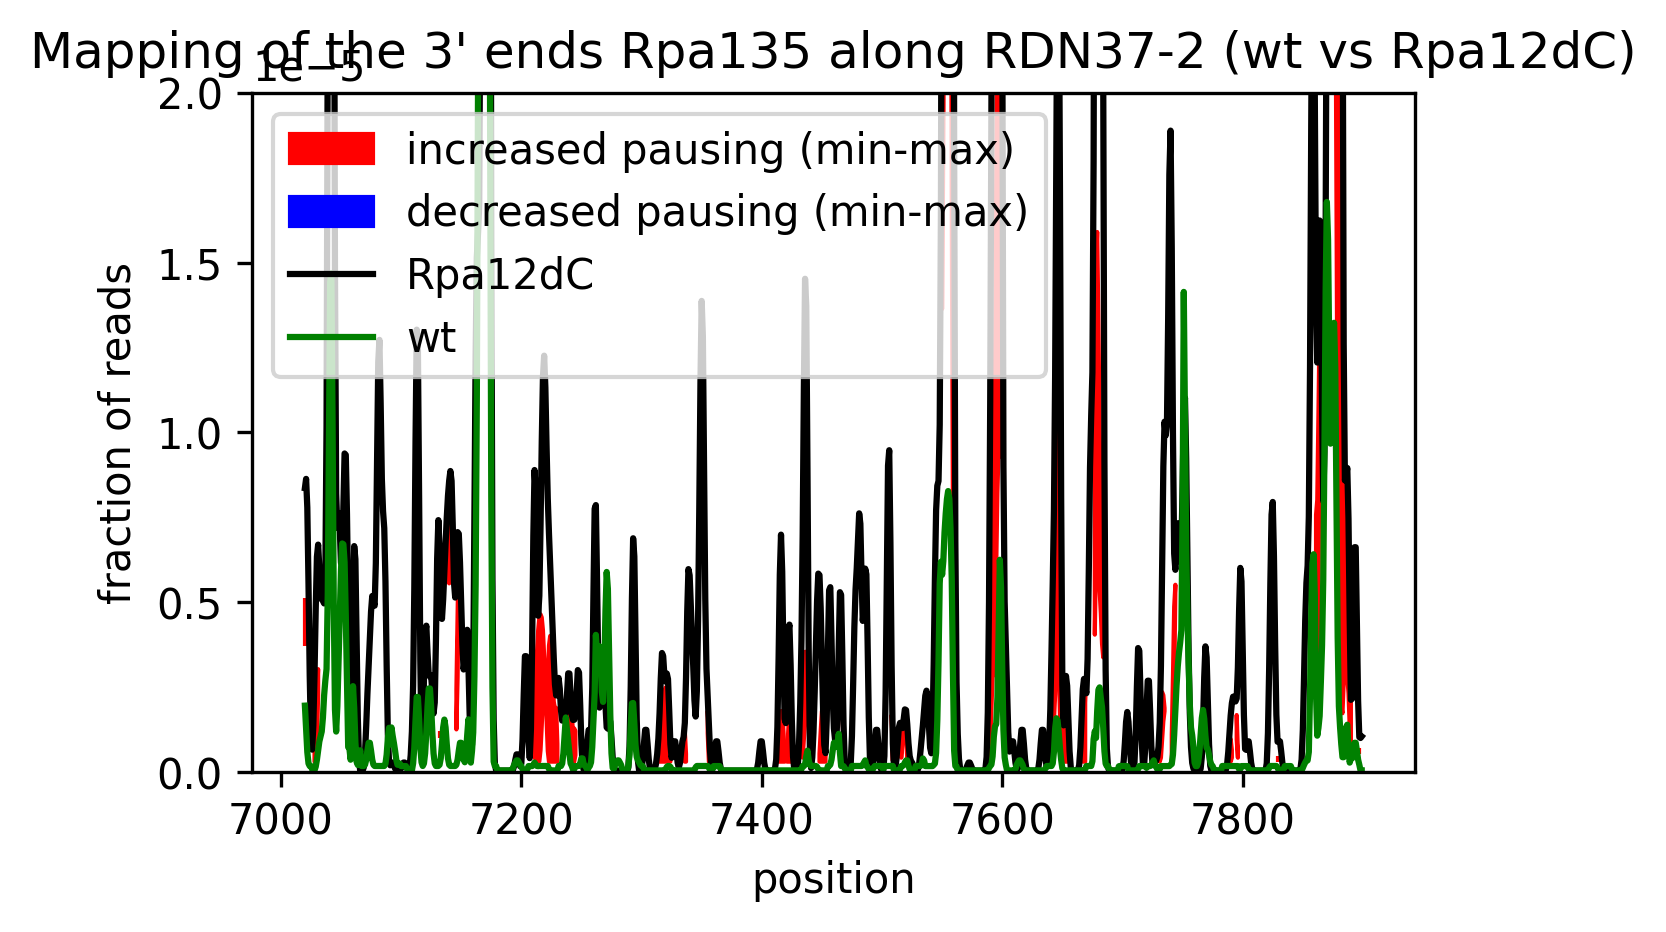

In [5]:
tt.plotting.plot_diff(ref=df11_Rpa135_wt_3end, dataset=df12_Rpa135_rpa12d_3end,figsize=(5,3),label1="wt",label2="Rpa12dC",
                           title="Mapping of the 3' ends Rpa135 along RDN37-2 (wt vs Rpa12dC)",plot_ranges=False,
                           dpi=300,offset=1300, ylim=(0,0.00002),ranges='mm',
                           start=1300+7020, stop=stop, fname='Fig_xB.png')

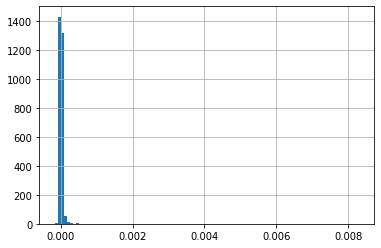

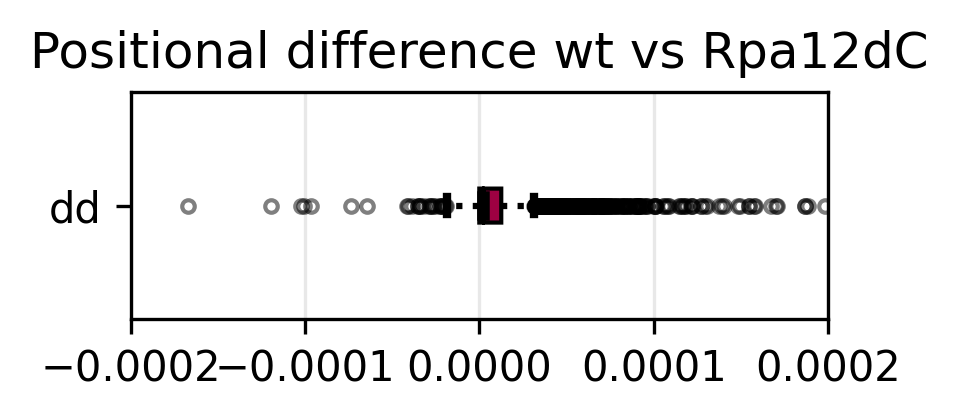

In [6]:
dd = a12dC['median']-wt['median']

dd.hist(bins=100)
plt.show()

tt.plotting.boxplot1(dd.dropna().tolist(),labels=["dd"],grid=True,figsize=(3,1),dpi=300,title="Positional difference wt vs Rpa12dC",vert=0,lim=(-0.0002,0.0002))

Experiments: 
['C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end']
Experiments: 
['C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end']


/tmp/ipykernel_29101/3310681343.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  data = [col.dropna().tolist() for c,col in pd.concat([df13_wt,df14_rpa12d]).iteritems()]


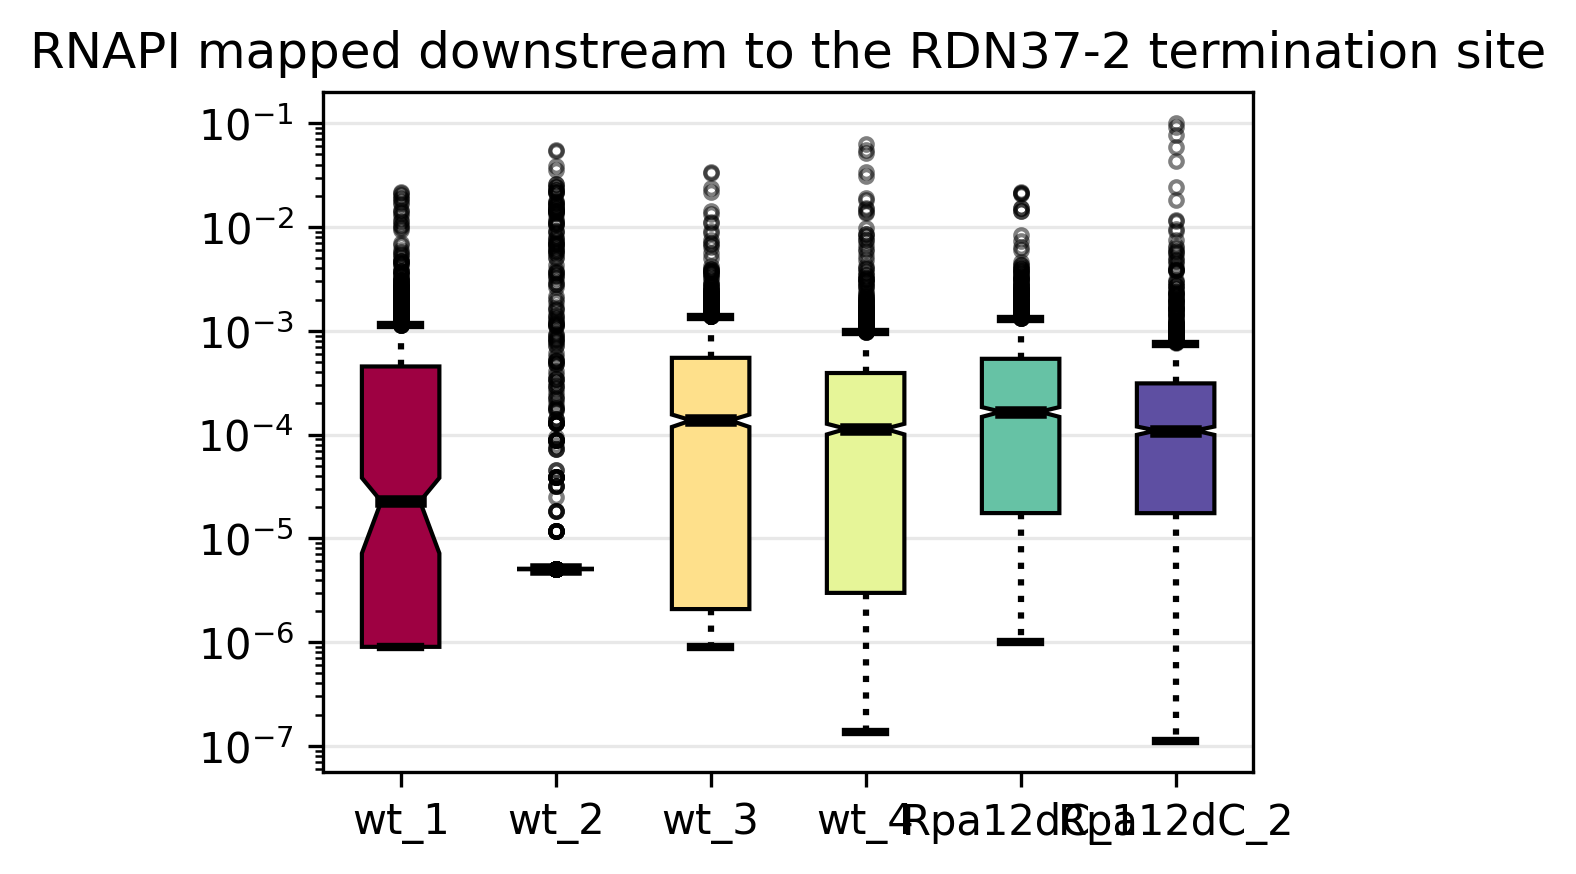

In [7]:
df13_wt = tt.profiles.preprocess(df01b_RDN372_datasets_3end[7100:stop],
                                     let_in=['Rpa135HTP'], 
                                     let_out=['Rpa12dC',"noUV"],stats=False)

df14_rpa12d = tt.profiles.preprocess(df01b_RDN372_datasets_3end[7100:stop],
                                     let_in=['Rpa135HTP','Rpa12dC'],stats=False)

data = [col.dropna().tolist() for c,col in pd.concat([df13_wt,df14_rpa12d]).iteritems()]
labels = ['wt_1',"wt_2","wt_3","wt_4","Rpa12dC_1","Rpa12dC_2"]

tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(4,3),dpi=300,title="RNAPI mapped downstream to the RDN37-2 termination site")

Experiments: 
['C18P2-TT170123_Rpa135HTP_wt_none_1_PROFILE_3end', 'C20P3-TT171005_Rpa135HTP_wt_none_x_PROFILE_3end', 'C23P2-TT181022_Rpa135HTP_wt_none_2_PROFILE_3end', 'EP190925_Rpa135HTP_wt_none_3_PROFILE_3end']
Experiments: 
['C23P2-TT181022_Rpa135HTP_Rpa12dC_none_1_PROFILE_3end', 'EP190925_Rpa135HTP_Rpa12dC_none_2_PROFILE_3end']


/tmp/ipykernel_29101/4276872031.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  data = [col.dropna().tolist() for c,col in pd.concat([df13_wt,df14_rpa12d]).iteritems()]


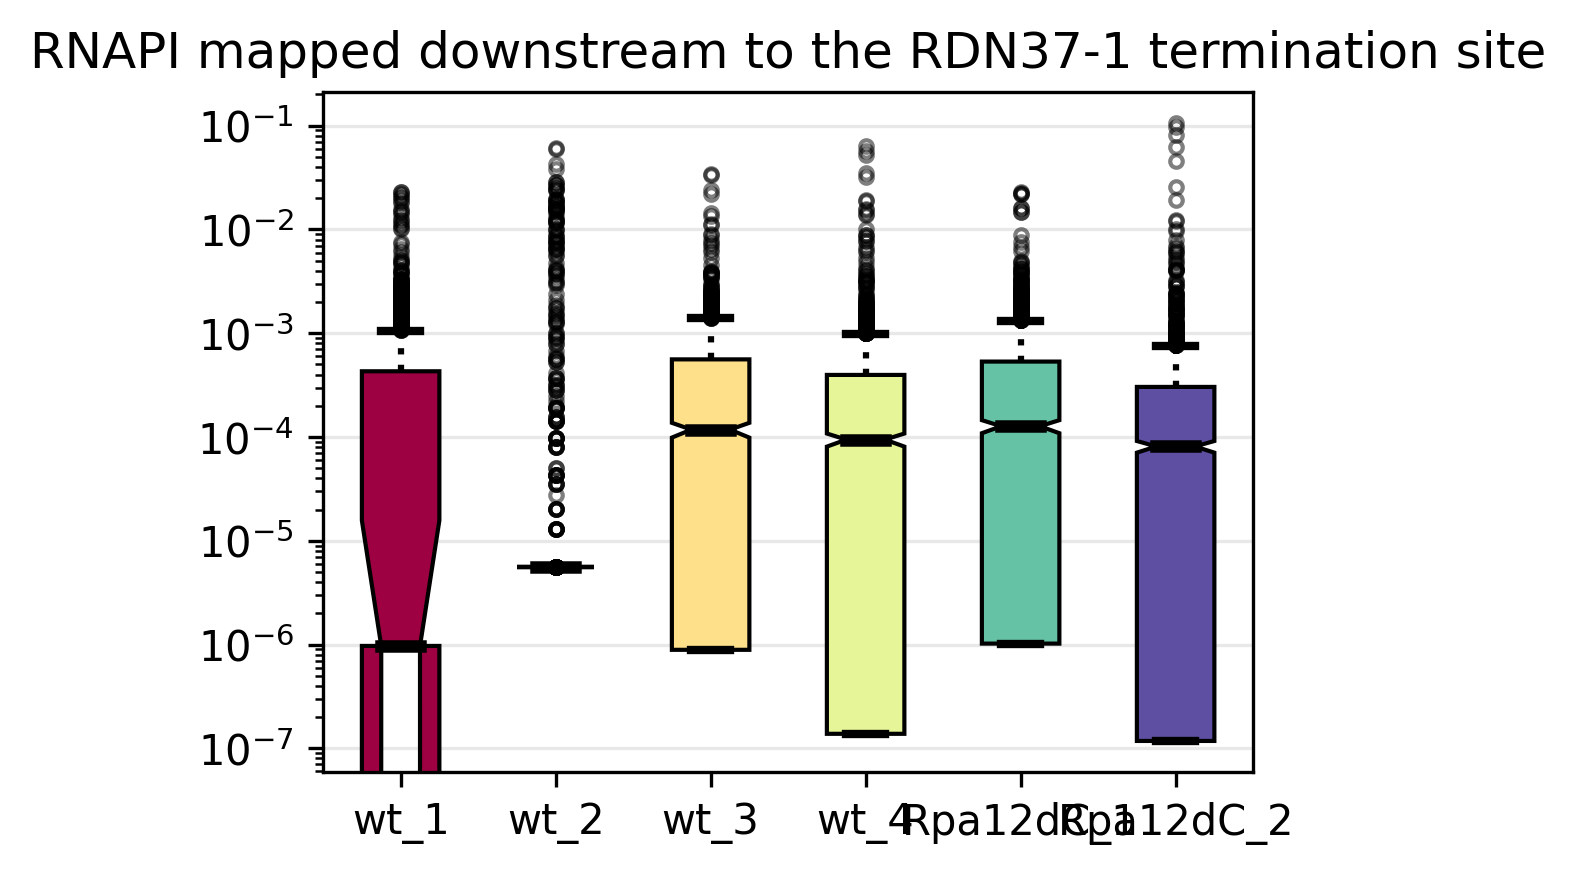

In [8]:
df13_wt = tt.profiles.preprocess(df01a_RDN371_datasets_3end[7100:stop],
                                     let_in=['Rpa135HTP'], 
                                     let_out=['Rpa12dC',"noUV"],stats=False)

df14_rpa12d = tt.profiles.preprocess(df01a_RDN371_datasets_3end[7100:stop],
                                     let_in=['Rpa135HTP','Rpa12dC'],stats=False)

data = [col.dropna().tolist() for c,col in pd.concat([df13_wt,df14_rpa12d]).iteritems()]
labels = ['wt_1',"wt_2","wt_3","wt_4","Rpa12dC_1","Rpa12dC_2"]


tt.plotting.boxplot1(data,labels,grid=True,log=True,figsize=(4,3),dpi=300,title="RNAPI mapped downstream to the RDN37-1 termination site")